# Imports

In [60]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 2.9 MB/s eta 0:00:00 0:00:01


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


# Loading Data JSON and CSV

In [24]:
df_csv = pd.read_csv("../svarah/meta_speaker_stats.csv")


In [30]:
import json

# Load manifest files
def load_manifest(file_path):
    with open(file_path, 'r') as file:
        data = [json.loads(line.strip()) for line in file]
    return pd.DataFrame(data)

# Load manifest files into DataFrames
df_svarah_manifest = load_manifest('../svarah/svarah_manifest.json')
df_saa_l1_manifest = load_manifest('../svarah/saa_l1_manifest.json')

In [31]:
df_svarah_manifest

,audio_filepath,duration,text
0,audio/281474976884635_f3269_chunk_0.wav,8.759500,Our district Hasana was the land of the great ...
1,audio/281474976885801_f2235_chunk_24.wav,3.100062,There is a gradual shift in the mentality
2,audio/281474976925705_f2479_chunk_0.wav,0.450062,Wow
3,audio/281474976901104_f2909_chunk_0.wav,2.721125,Nipah virus belongs to the
4,audio/281474976888137_f2862_chunk_0.wav,3.694313,How much money is left in my Arunachal Pradesh...
...,...,...,...
6651,audio/281474976894318_f1066_chunk_0.wav,0.405438,Five
6652,audio/281474976901670_f1976_chunk_3.wav,4.916313,"Instead, it is the way the climatic condition"
6653,audio/281474976925497_f3223_chunk_0.wav,3.620000,Dance can be used as a vehicle of expressions.
6654,audio/281474976884627_f3339_chunk_1.wav,4.540125,and every day I deposit our kitchen waste and ...


In [32]:
df_saa_l1_manifest

,audio_filepath,duration,text
0,/data/tahir/indic-whisper-evals/speech-archive...,0.332554,Please call Stella. Ask her to bring these th...
1,/data/tahir/indic-whisper-evals/speech-archive...,0.379978,Please call Stella. Ask her to bring these th...
2,/data/tahir/indic-whisper-evals/speech-archive...,0.380753,Please call Stella. Ask her to bring these th...
3,/data/tahir/indic-whisper-evals/speech-archive...,0.312060,Please call Stella. Ask her to bring these th...
4,/data/tahir/indic-whisper-evals/speech-archive...,0.320246,Please call Stella. Ask her to bring these th...
...,...,...,...
574,/data/tahir/indic-whisper-evals/speech-archive...,0.438857,Please call Stella. Ask her to bring these th...
575,/data/tahir/indic-whisper-evals/speech-archive...,0.353217,Please call Stella. Ask her to bring these th...
576,/data/tahir/indic-whisper-evals/speech-archive...,0.395436,Please call Stella. Ask her to bring these th...
577,/data/tahir/indic-whisper-evals/speech-archive...,0.384339,Please call Stella. Ask her to bring these th...


# Data Overview

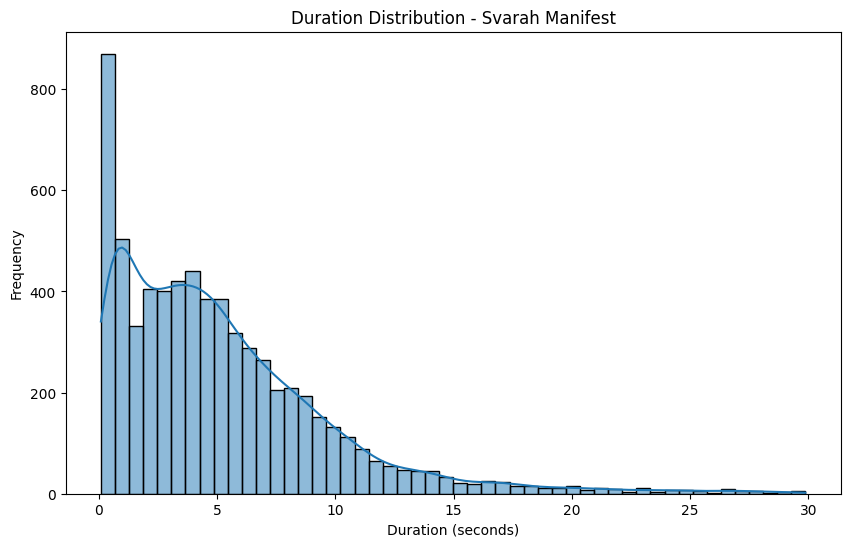

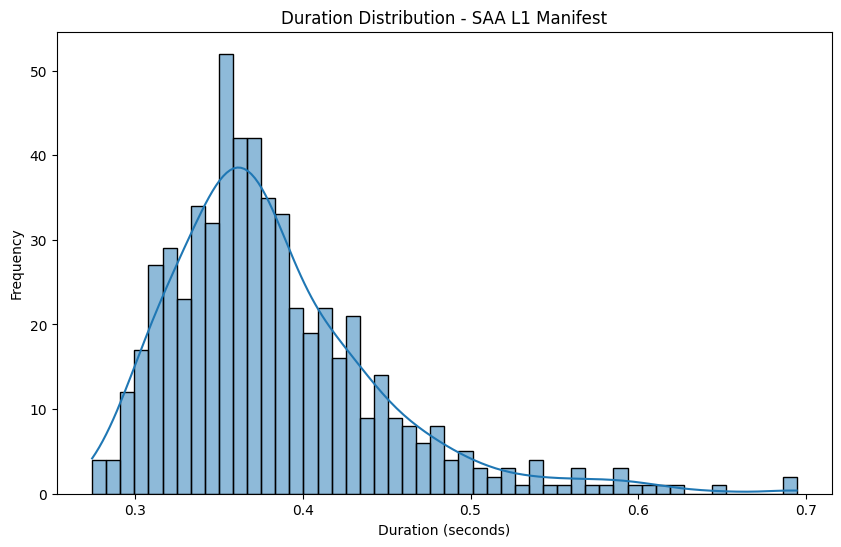

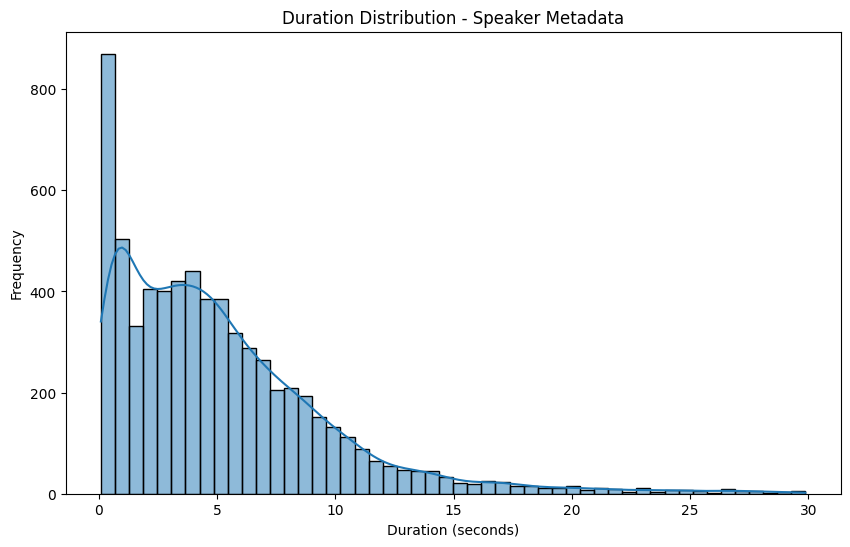

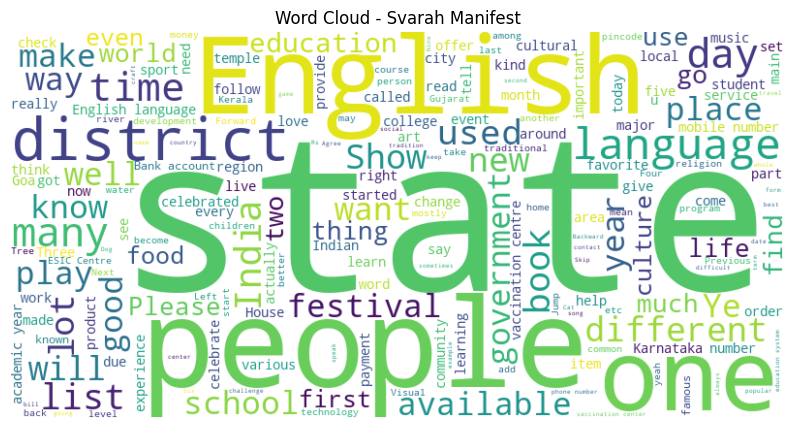

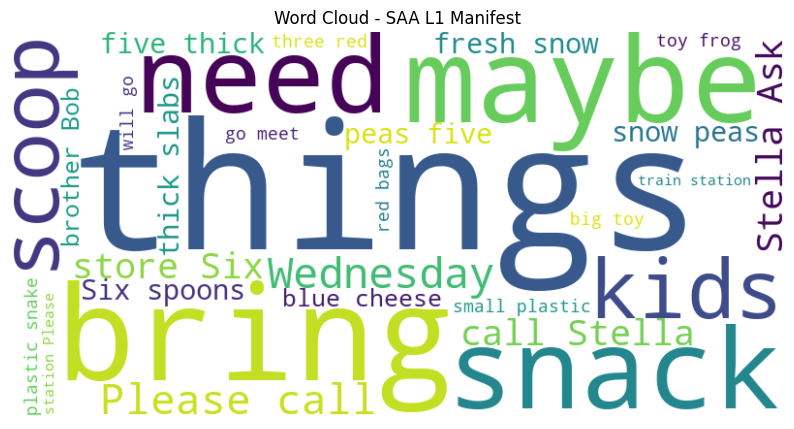

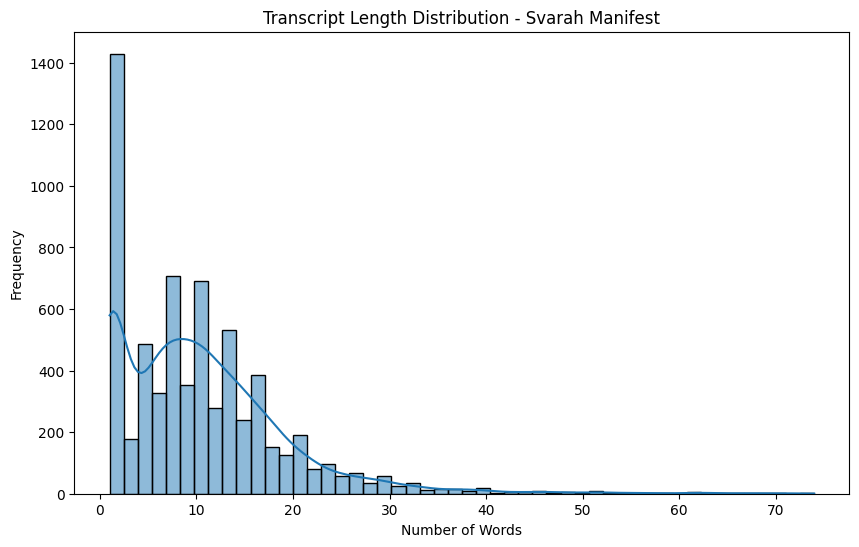

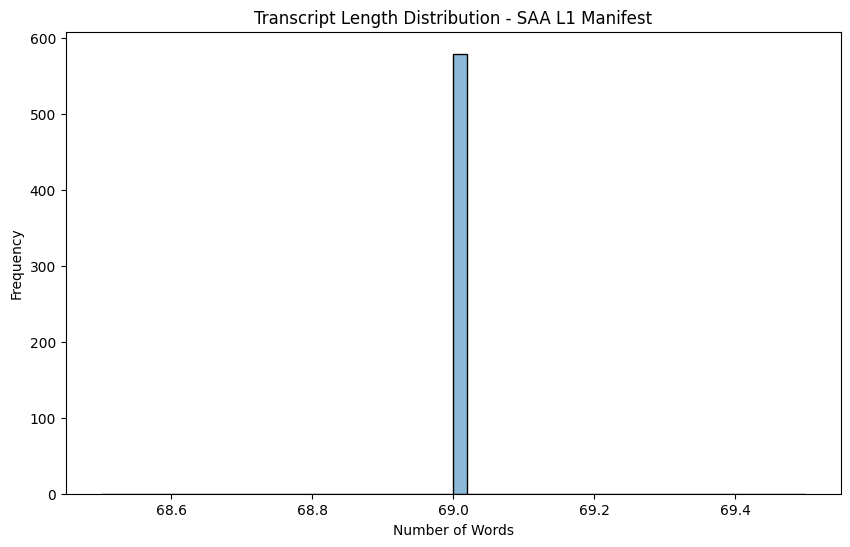

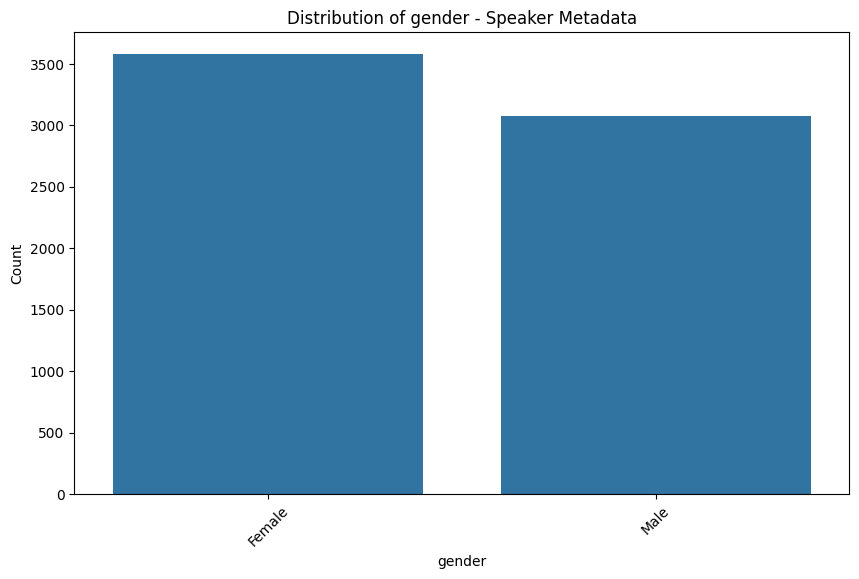

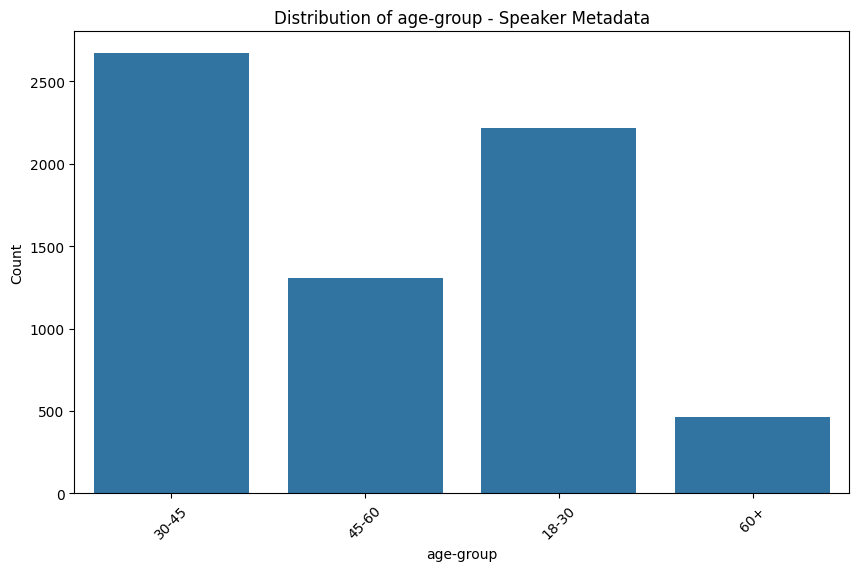

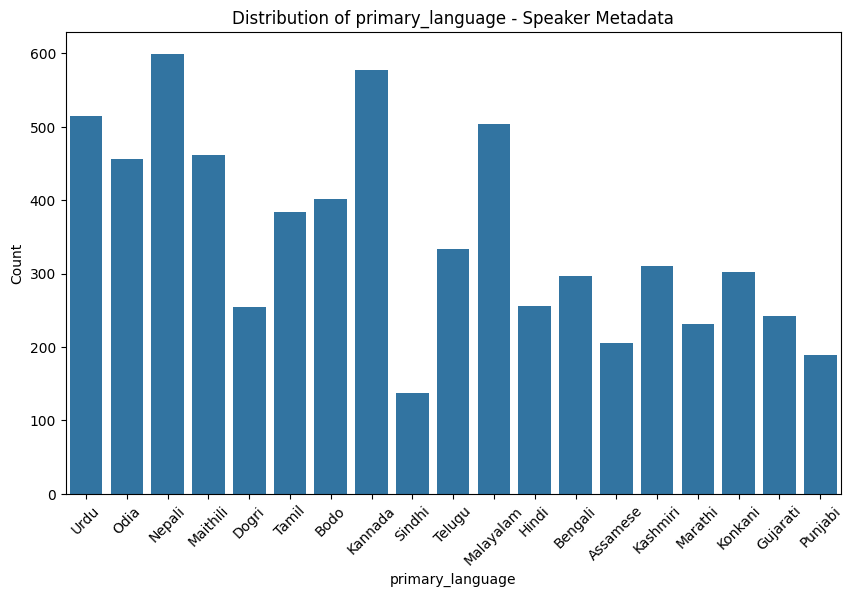

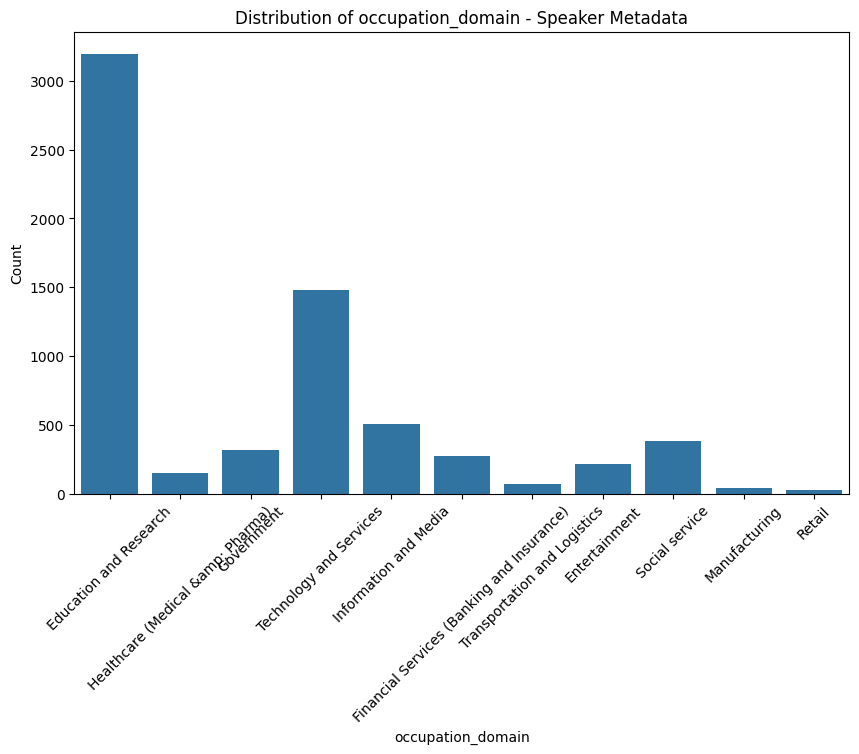

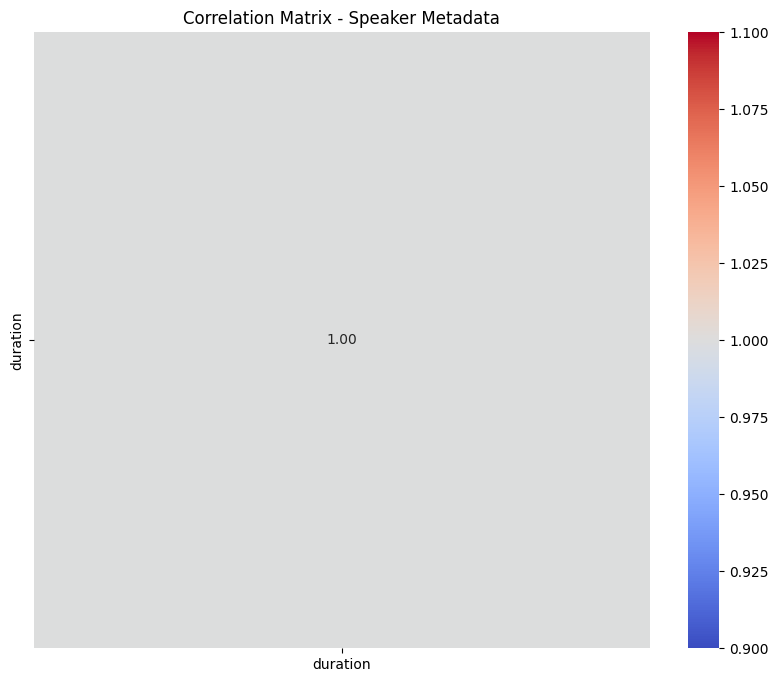

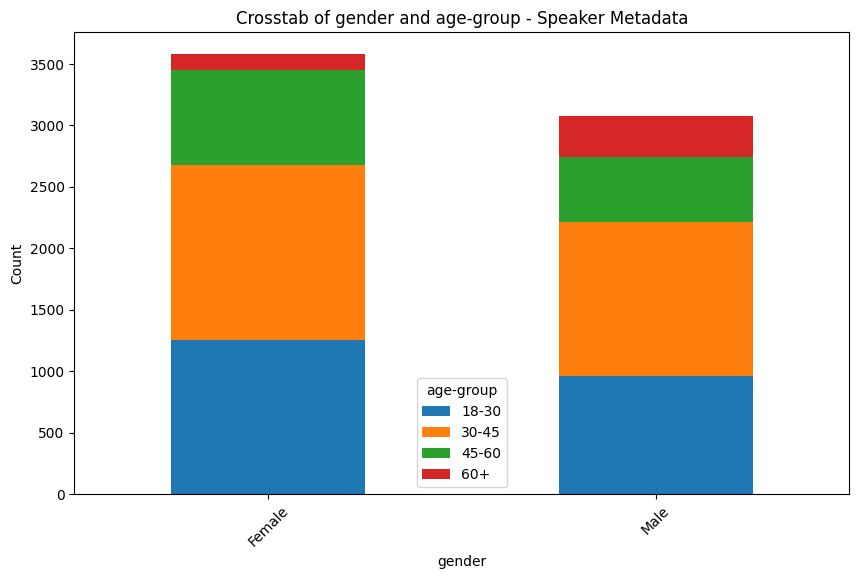

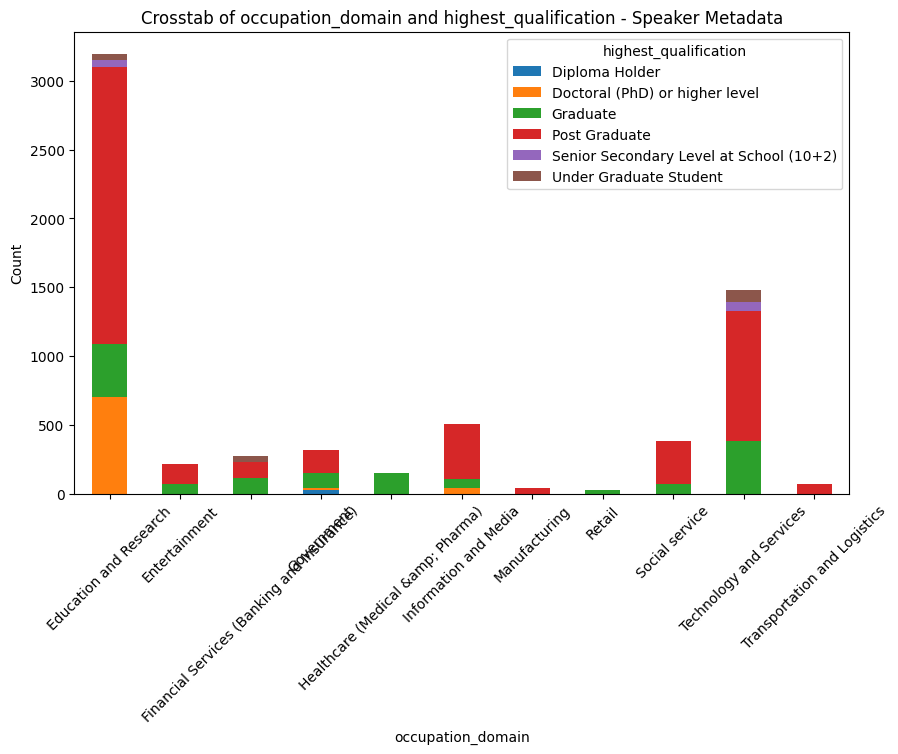

In [66]:

# Duration Distribution
def plot_duration_distribution(df, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['duration'], bins=50, kde=True)
    plt.title(f'Duration Distribution - {title}')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Frequency')
    plt.show()

plot_duration_distribution(df_svarah_manifest, 'Svarah Manifest')
plot_duration_distribution(df_saa_l1_manifest, 'SAA L1 Manifest')
plot_duration_distribution(df_csv, 'Speaker Metadata')

# Word Cloud of Most Common Words in Transcripts

def plot_wordcloud(df, title):
    text = ' '.join(df['text'].dropna().values)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud - {title}')
    plt.axis('off')
    plt.show()

plot_wordcloud(df_svarah_manifest, 'Svarah Manifest')
plot_wordcloud(df_saa_l1_manifest, 'SAA L1 Manifest')

# Transcript Length Distribution
def plot_transcript_length_distribution(df, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['word_count'], bins=50, kde=True)
    plt.title(f'Transcript Length Distribution - {title}')
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.show()

plot_transcript_length_distribution(df_svarah_manifest, 'Svarah Manifest')
plot_transcript_length_distribution(df_saa_l1_manifest, 'SAA L1 Manifest')

# Speaker Demographics Visualization
def plot_categorical_distribution(df, column, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column} - {title}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

plot_categorical_distribution(df_csv, 'gender', 'Speaker Metadata')
plot_categorical_distribution(df_csv, 'age-group', 'Speaker Metadata')
plot_categorical_distribution(df_csv, 'primary_language', 'Speaker Metadata')
plot_categorical_distribution(df_csv, 'occupation_domain', 'Speaker Metadata')


# Correlation Matrix
def plot_correlation_matrix(df, title):
    plt.figure(figsize=(10, 8))
    corr = df.corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title(f'Correlation Matrix - {title}')
    plt.show()

# Only applying to numerical columns in the Speaker Metadata
numerical_columns = ['duration']
plot_correlation_matrix(df_csv[numerical_columns], 'Speaker Metadata')

# Cross-tabulation
def plot_crosstab(df, col1, col2, title):
    crosstab = pd.crosstab(df[col1], df[col2])
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Crosstab of {col1} and {col2} - {title}')
    plt.xlabel(col1)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

plot_crosstab(df_csv, 'gender', 'age-group', 'Speaker Metadata')
plot_crosstab(df_csv, 'occupation_domain', 'highest_qualification', 'Speaker Metadata')

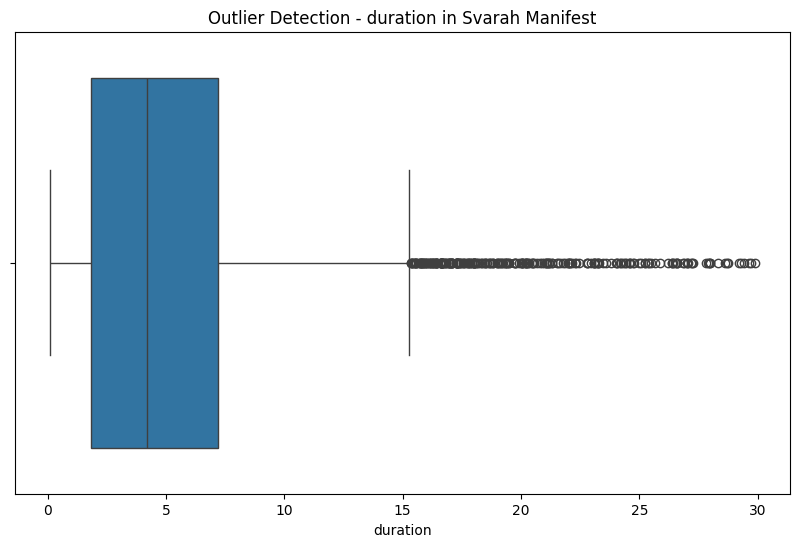

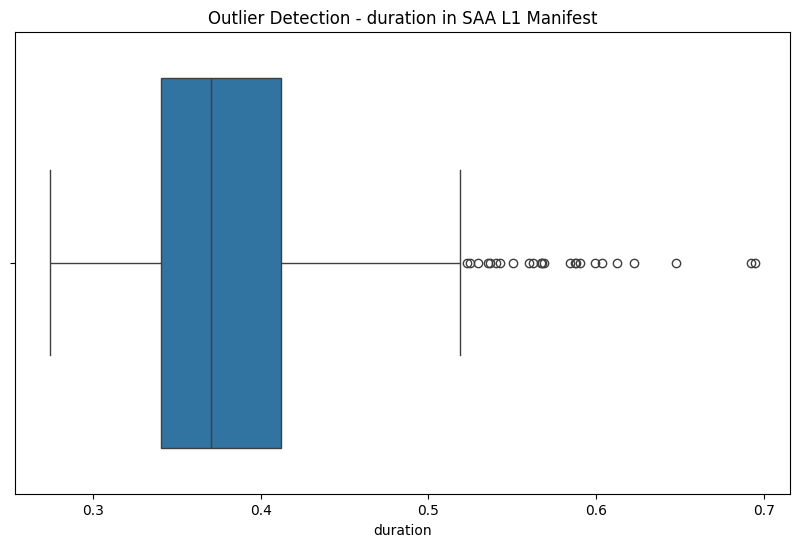

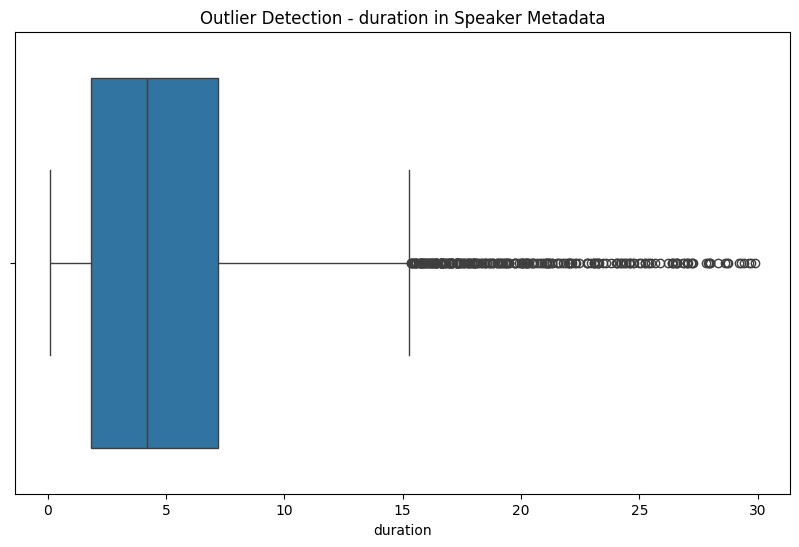

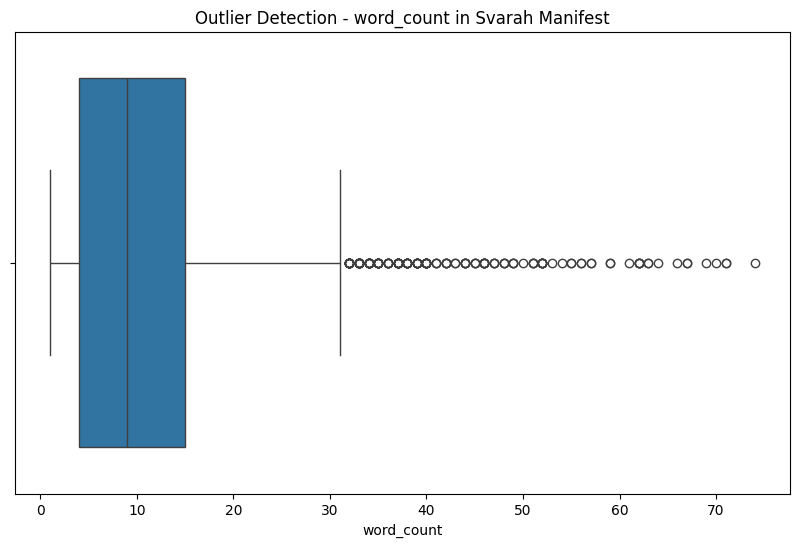

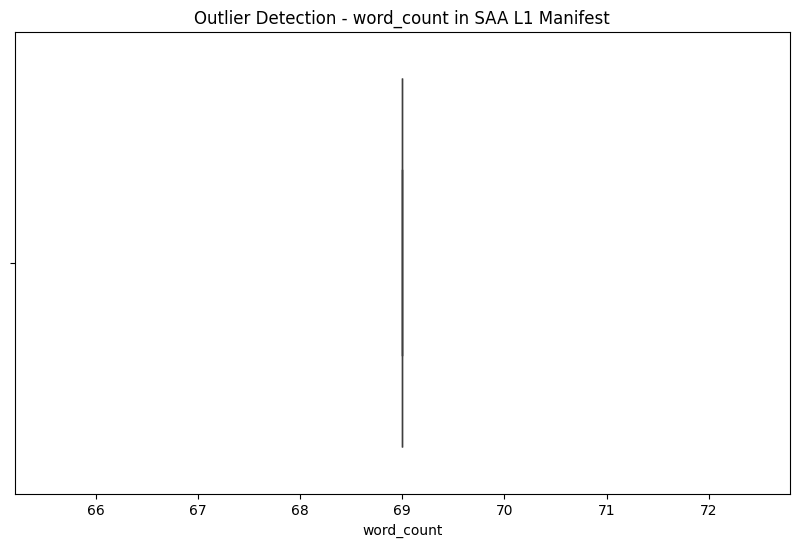

In [69]:
# Outlier Detection in Duration
def plot_outliers(df, column, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Outlier Detection - {column} in {title}')
    plt.xlabel(column)
    plt.show()

plot_outliers(df_svarah_manifest, 'duration', 'Svarah Manifest')
plot_outliers(df_saa_l1_manifest, 'duration', 'SAA L1 Manifest')
plot_outliers(df_csv, 'duration', 'Speaker Metadata')

# Word count for each 'text' field in manifest files
df_svarah_manifest['word_count'] = svarah_manifest_df['text'].apply(lambda x: len(x.split()))
df_saa_l1_manifest['word_count'] = saa_l1_manifest_df['text'].apply(lambda x: len(x.split()))

# Outlier Detection in Transcript Length
plot_outliers(df_svarah_manifest, 'word_count', 'Svarah Manifest')
plot_outliers(df_saa_l1_manifest, 'word_count', 'SAA L1 Manifest')

KeyError: 'speaker_id'